<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/texto_a_grafo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 4.3 MB/s 


In [2]:
import nltk
import string
from PyPDF2 import PdfReader
import seaborn as sns
sns.set_theme(style="darkgrid")
from google.colab import drive
drive.mount('/content/drive')
nltk.download("stopwords")
nltk.download('punkt')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.corpus import stopwords
import networkx as nx
import numpy as np
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:


text = "Esto es un ejemplo de prueba en español. Gracias por leer." 
words = nltk.word_tokenize(text)

print("Unfiltered: ", words)
stopwords = nltk.corpus.stopwords.words("spanish")

cleaned = [word for word in words if word not in stopwords]
print("Filtered: ", cleaned)

Unfiltered:  ['Esto', 'es', 'un', 'ejemplo', 'de', 'prueba', 'en', 'español', '.', 'Gracias', 'por', 'leer', '.']
Filtered:  ['Esto', 'ejemplo', 'prueba', 'español', '.', 'Gracias', 'leer', '.']


In [5]:
text = "This is an example text for stopword removal and filtering. This is done using NLTK's stopwords."  
words = nltk.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words("english")

# Extending the stopwords list
stopwords.extend(string.punctuation)

# Remove stop words and tokens with length < 2
cleaned = [word.lower() for word in words if (word not in stopwords) and len(word) > 2]
print(cleaned)

['this', 'example', 'text', 'stopword', 'removal', 'filtering', 'this', 'done', 'using', 'nltk', 'stopwords']


In [6]:
text = "Esto es un ejemplo de prueba en español. Gracias por leer." 
words = nltk.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words("english")

# Extending the stopwords list
stopwords.extend(string.punctuation)

# Remove stop words and tokens with length < 2
cleaned = [word.lower() for word in words if (word not in stopwords) and len(word) > 2]
print(cleaned)

['esto', 'ejemplo', 'prueba', 'español', 'gracias', 'por', 'leer']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["I'd like an apple", 
          "An apple a day keeps the doctor away", 
          "Never compare an apple to an orange", 
          "I prefer scikit-learn to Orange", 
          "The scikit-learn docs are Orange and Blue"]                                                                                                                                                                                                   
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 

In [ ]:
A=pairwise_similarity.toarray()                                                                                                                                                                                                                            
print(A)

A_filtrada= (A > 0.18).astype(int)
print(A_filtrada)

[[1.         0.17668795 0.27056873 0.         0.        ]
 [0.17668795 1.         0.15439436 0.         0.        ]
 [0.27056873 0.15439436 1.         0.19635649 0.16815247]
 [0.         0.         0.19635649 1.         0.54499756]
 [0.         0.         0.16815247 0.54499756 1.        ]]
[[1 0 1 0 0]
 [0 1 0 0 0]
 [1 0 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]]


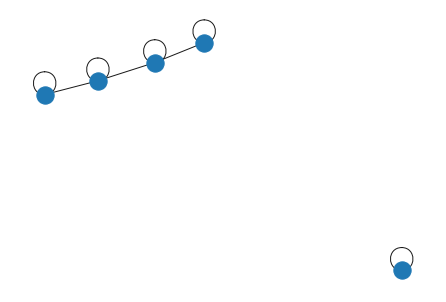

In [ ]:

G = nx.from_numpy_matrix(A_filtrada)
nx.draw(G)

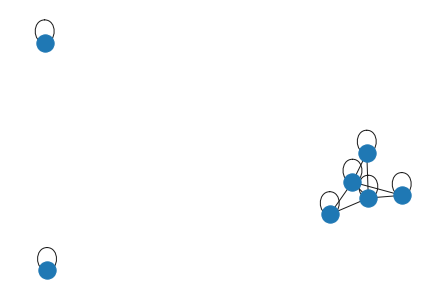

In [28]:
corpus = [ "El hombre que desembarcó en Buenos Aires en 1871 se llamaba Johannes Dahlmann y era pastor de la Iglesia evangélica; en 1939, uno de sus nietos, Juan Dahlmann, era secretario de una biblioteca municipal en la calle Córdoba y se sentía hondamente argentino. Su abuelo materno había sido aquel Francisco Flores, del 2 de infantería de línea, que murió en la frontera de Buenos Aires, lanceado por indios de Catriel: en la discordia de sus dos linajes, Juan Dahlmann (tal vez a impulso de la sangre germánica) eligió el de ese antepasado romántico, o de muerte romántica. Un estuche con el daguerrotipo de un hombre inexpresivo y barbado, una vieja espada, la dicha y el coraje de ciertas músicas, el hábito de estrofas del Martín Fierro, los años, el desgano y la soledad, fomentaron ese criollismo algo voluntario, pero nunca ostentoso. A costa de algunas privaciones, Dahlmann había logrado salvar el casco de una estancia en el Sur, que fue de los Flores: una de las costumbres de su memoria era la imagen de los eucaliptos balsámicos y de la larga casa rosada que alguna vez fue carmesí. Las tareas y acaso la indolencia lo retenían en la ciudad. Verano tras verano se contentaba con la idea abstracta de posesión y con la certidumbre de que su casa estaba esperándolo, en un sitio preciso de la llanura. En los últimos días de febrero de 1939, algo le aconteció.",
          "Ciego a las culpas, el destino puede ser despiadado con las mínimas distracciones. Dahlmann había conseguido, esa tarde, un ejemplar descabalado de Las Mil y Una Noches de Weil; ávido de examinar ese hallazgo, no esperó que bajara el ascensor y subió con apuro las escaleras; algo en la oscuridad le rozó la frente, ¿un murciélago, un pájaro? En la cara de la mujer que le abrió la puerta vio grabado el horror, y la mano que se pasó por la frente salió roja de sangre. La arista de un batiente recién pintado que alguien se olvidó de cerrar le habría hecho esa herida. Dahlmann logró dormir, pero a la madrugada estaba despierto y desde aquella hora el sabor de todas las cosas fue atroz. La fiebre lo gastó y las ilustraciones de Las Mil y Una Noches sirvieron para decorar pasadillas. Amigos y parientes lo visitaban y con exagerada sonrisa le repetían que lo hallaban muy bien. Dahlmann los oía con una especie de débil estupor y le maravillaba que no supieran que estaba en el infierno. Ocho días pasaron, como ocho siglos. Una tarde, el médico habitual se presentó con un médico nuevo y lo condujeron a un sanatorio de la calle Ecuador, porque era indispensable sacarle una radiografía. Dahlmann, en el coche de plaza que los llevó, pensó que en una habitación que no fuera la suya podría, al fin, dormir. Se sintió feliz y conversador; en cuanto llegó, lo desvistieron; le raparon la cabeza, lo sujetaron con metales a una camilla, lo iluminaron hasta la ceguera y el vértigo, lo auscultaron y un hombre enmascarado le clavó una aguja en el brazo. Se despertó con náuseas, vendado, en una celda que tenía algo de pozo y, en los días y noches que siguieron a la operación pudo entender que apenas había estado, hasta entonces, en un arrabal del infierno. El hielo no dejaba en su boca el menor rastro de frescura. En esos días, Dahlmann minuciosamente se odió; odió su identidad, sus necesidades corporales, su humillación, la barba que le erizaba la cara. Sufrió con estoicismo las curaciones, que eran muy dolorosas, pero cuando el cirujano le dijo que había estado a punto de morir de una septicemia, Dahlmann se echó a llorar, condolido de su destino. Las miserias físicas y la incesante previsión de las malas noches no le habían dejado pensar en algo tan abstracto como la muerte. Otro día, el cirujano le dijo que estaba reponiéndose y que, muy pronto, podría ir a convalecer a la estancia. Increíblemente, el día prometido llegó.",
          "A la realidad le gustan las simetrías y los leves anacronismos; Dahlmann había llegado al sanatorio en un coche de plaza y ahora un coche de plaza lo llevaba a Constitución. La primera frescura del otoño, después de la opresión del verano, era como un símbolo natural de su destino rescatado de la muerte y la fiebre. La ciudad, a las siete de la mañana, no había perdido ese aire de casa vieja que le infunde la noche; las calles eran como largos zaguanes, las plazas como patios. Dahlmann la reconocía con felicidad y con un principio de vértigo; unos segundos antes de que las registraran sus ojos, recordaba las esquinas, las carteleras, las modestas diferencias de Buenos Aires. En la luz amarilla del nuevo día, todas las cosas regresaban a él.",
          "Nadie ignora que el Sur empieza del otro lado de Rivadavia. Dahlmann solía repetir que ello no es una convención y que quien atraviesa esa calle entra en un mundo más antiguo y más firme. Desde el coche buscaba entre la nueva edificación, la ventana de rejas, el llamador, el arco de la puerta, el zaguán, el íntimo patio.",
          "En el hall de la estación advirtió que faltaban treinta minutos. Recordó bruscamente que en un café de la calle Brasil (a pocos metros de la casa de Yrigoyen) había un enorme gato que se dejaba acariciar por la gente, como una divinidad desdeñosa. Entró. Ahí estaba el gato, dormido. Pidió una taza de café, la endulzó lentamente, la probó (ese placer le había sido vedado en la clínica) y pensó, mientras alisaba el negro pelaje, que aquel contacto era ilusorio y que estaban como separados por un cristal, porque el hombre vive en el tiempo, en la sucesión, y el mágico animal, en la actualidad, en la eternidad del instante.",
          "A lo largo del penúltimo andén el tren esperaba. Dahlmann recorrió los vagones y dio con uno casi vacío. Acomodó en la red la valija; cuando los coches arrancaron, la abrió y sacó, tras alguna vacilación, el primer tomo de Las Mil y Una Noches. Viajar con este libro, tan vinculado a la historia de su desdicha, era una afirmación de que esa desdicha había sido anulada y un desafío alegre y secreto a las frustradas fuerzas del mal.",
          "A los lados del tren, la ciudad se desgarraba en suburbios; esta visión y luego la de jardines y quintas demoraron el principio de la lectura. La verdad es que Dahlmann leyó poco; la montaña de piedra imán y el genio que ha jurado matar a su bienhechor eran, quién lo niega, maravillosos, pero no mucho más que la mañana y que el hecho de ser. La felicidad lo distraía de Shahrazad y de sus milagros superfluos; Dahlmann cerraba el libro y se dejaba simplemente vivir."]

vect = TfidfVectorizer(min_df=1)#, stop_words="spanish")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T    
A=pairwise_similarity.toarray()                                                                                                                                                                                                                            


A_filtrada= (A > 0.4).astype(int)
G = nx.from_numpy_matrix(A_filtrada)
pos = nx.spring_layout(G)
nx.draw(G,pos)

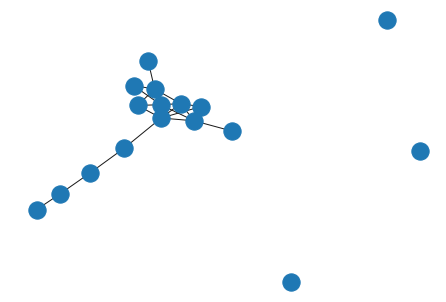

In [29]:
#fuente:  https://www.medina502.com/classes/ml260_2017/readings/Borges-The_South.pdf
corpus=["The man who landed in Buenos Aires in 1871 bore the name of Johannes Dahlmann and he was a minister in the Evangelical Church. In 1939, one of his grandchildren, Juan Dahlmann, was secretary of a municipal library on Calle Cordoba, and he considered himself profoundly Argentinian. His maternal grandfather had been that Francisco Flores, of the Second Line-Infantry Division, who had died on the frontier of Buenos Aires, run through with a lance by Indians from Catriel; in the discord inherent 1between his two lines of descent, Juan Dahlmann (perhaps driven to it by his Germanic blood) chose the line represented by his romantic ancestor, his ancestor of the romantic death. An old sword, a leather frame containing the daguerreotype of a blankfaced man with a beard, the dash and grace of certain music, the familiar strophes of Martin Fierro, the passing years, boredom and solitude, all went to foster this voluntary, but never ostentatious nationalism. At the cost of numerous small privations, Dahlmann had managed to save the empty shell of a ranch in the South which had belonged to the Flores family; he continually recalled the image of the balsamic eucalyptus trees and the great rose-colored house which had once been crimson. His duties, perhaps even indolence, kept him in the city. Summer after summer he contented himself with the abstract idea of possession and with the certitude that his ranch was waiting for him on a precise site in the middle of the plain. Late in February, 1939, something happened to him.",
        "Blind to all fault, destiny can be ruthless at one's slightest distraction. Dahlmann had succeeded in acquiring, on that very afternoon, an imperfect copy of Weil's edition of The Thousand and One Nights. Avid to examine this find, he did not wait for the elevator but hurried up the stairs. In the obscurity, something brushed by his forehead: a bat, a bird? On the face of the woman who opened the door to him he saw horror engraved, and the hand he wiped across his face came away red with blood. The edge of a recently painted door which someone had forgotten to close had caused this wound. Dahlmann was able to fall asleep, but from the moment he awoke at dawn the savor of all things was atrociously poignant. Fever wasted him and the pictures in The Thousand and One Nights served to illustrate nightmares. Friends and relatives paid him visits and, with exaggerated smiles, assured him that they thought he looked fine. Dahlmann listened to them with a kind of feeble stupor and he marveled at their not knowing that he was in hell. A week, eight days passed, and they were like eight centuries. One afternoon, the usual doctor appeared, accompanied by a new doctor, and they carried him off to a sanitarium on the Calle Ecuador, for it was necessary to Xray him. Dahlmann, in the hackney coach which bore them away, thought that he would, at last, be able to sleep in a room different from his own. He felt happy and communicative. When he arrived at his destination, they undressed him, shaved his head, bound him with metal fastenings to a stretcher; they shone bright lights on him until he was blind and dizzy, auscultated him, and a masked man stuck a needle into his arm. He awoke with a feeling of nausea, covered with a bandage, in a cell with something of a well about it; in the days and nights which followed the operation he 2came to realize that he had merely been, up until then, in a suburb of hell. Ice in his mouth did not leave the least trace of freshness. During these days Dahlmann hated himself in minute detail: he hated his identity, his bodily necessities, his humiliation, the beard which bristled up on his face. He stoically endured the curative measures, which were painful, but when the surgeon told him he had been on the point of death from septicemia, Dahlmann dissolved in tears of self-pity for his fate. Physical wretchedness and the incessant anticipation of horrible nights had not allowed him time to think of anything so abstract as death. On another day, the surgeon told him he was healing and that, very soon, he would be able to go to his ranch for convalescence. Incredibly enough, the promised day arrived.",
        "Reality favors symmetries and slight anachronisms: Dahlmann had arrived at the sanitarium in a hackney coach and now a hackney coach was to take him to the Constitucion station. The first fresh tang of autumn, after the summer's oppressiveness, seemed like a symbol in nature of his rescue and release from fever and death. The city, at seven in the morning, had not lost that air of an old house lent it by the night; the streets seemed like long vestibules, the plazas were like patios. Dahlmann recognized the city with joy on the edge of vertigo: a second before his eyes registered the phenomena themselves, he recalled the corners, the billboards, the modest variety of Buenos Aires. In the yellow light of the new day, all things returned to him.",
        "Every Argentine knows that the South begins at the other side of Rivadavia. Dahlmann was in the habit of saying that this was no mere convention, that whoever crosses this street enters a more ancient and sterner world. From inside the carriage he sought out, among the new buildings, the iron grill window, the brass knocker, the arched door, the entrance way, the intimate patio.",
        "At the railroad station he noted that he still had thirty minutes. He quickly recalled that in a cafe on the Calle Brazil (a few dozen feet from Yrigoyen's house) there was an enormous cat which allowed itself to be caressed as if it were a disdainful divinity. He entered the cafe. There was the cat, asleep. He ordered a cup of coffee, slowly stirred the sugar, sipped it (this pleasure had been denied him in the clinic), and thought, as he smoothed the cat's black coat, that this contact was an illusion and that the two beings, man and cat, were as good as separated by a glass, for man lives in time, in succession, while the magical animal lives in the present, in the eternity of the instant.",
        "Along the next to the last platform the train lay waiting. Dahlmann walked through the coaches until he found one almost empty. He arranged his baggage in the network rack. When the train started off, he took down his valise and extracted, after some hesitation, the first volume of The Thousand and One Nights. To travel with this book, which was so much a part of the history of his ill-fortune, was a kind of affirmation that his ill-fortune had been annulled; it was a joyous and secret defiance of the frustrated forces of evil.",
        "Lunch - the bouillon served in shining metal bowls, as in the remote summers of childhood - was one more peaceful and rewarding delight. Tomorrow I'll wake up at the ranch, he thought, and it was as if he was two men at a time: the man who traveled through the autumn day and across the geography of the fatherland, and the other one, locked up in a sanitarium and subject to methodical servitude. He saw unplastered brick houses, long and angled, timelessly watching the trains go by; he saw horsemen along the dirt roads; he saw gullies and lagoons and ranches; he saw great luminous clouds that resembled marble; and all these things were accidental, casual, like dreams of the plain. He also thought he recognized trees and crop fields; but he would not have been able to name them, for his actual knowledge of the country side was quite inferior to his nostalgic and literary knowledge.",
        "From time to time he slept, and his dreams were animated by the impetus of the train. The intolerable white sun of high noon had already become the yellow sun which precedes nightfall, and it would not be long before it would turn red. The railroad car was now also different; it was not the same as the one which had quit the station siding at Constitucion; the plain and the hours had transfigured it. Outside, the moving shadow of the railroad car stretched toward the horizon. The elemental earth was not perturbed either by settlements or other signs of humanity. The country was vast but at 4the same time intimate and, in some measure, secret. The limitless country sometimes contained only a solitary bull. The solitude was perfect, perhaps hostile, and it might have occurred to Dahlmann that he was traveling into the past and not merely south. He was distracted form these considerations by the railroad inspector who, on reading his ticket, advised him that the train would not let him off at the regular station but at another: an earlier stop, one scarcely known to Dahlmann. (The man added an explanation which Dahlmann did not attempt to understand, and which he hardly heard, for the mechanism of events did not concern him.)",
        "The train laboriously ground to a halt, practically in the middle of the plain. The station lay on the other side of the tracks; it was not much more than a siding and a shed. There was no means of conveyance to be seen, but the station chief supposed that the traveler might secure a vehicle from a general store and inn to be found some ten or twelve blocks away.",
        "The general store at one time had been painted a deep scarlet, but the years had tempered this violent color for its own good. Something in its poor architecture recalled a steel engraving, perhaps one from an old edition of Paul et Virginie. A number of horses were hitched up to the paling. Once inside, Dahlmann thought he recognized the shopkeeper. Then he realized that he had been deceived by the man's resemblance to one of the male nurses in the sanitarium. When the shopkeeper heard Dahlmann's request, he said he would have the shay made up. In order to add one more event to that day and to kill time, Dahlmann decided to eat at the general store.",
        "Some country louts, to whom Dahlmann did not at first pay any attention, were eating and drinking at one of the tables. On the floor, and hanging on to the bar, squatted an old man, immobile as an object. His years had reduced and polished him as water does a stone or the generations of men do a sentence. He was dark, dried up , diminutive, and seemed outside time, situated in eternity. Dahlmann noted with satisfaction the kerchief, the thick poncho, the long chiripa, and the colt boots, and told himself, as he recalled futile discussions with people from the Northern counties or 5from the province of Entre Rios, that gauchos like this no longer existed outside the South.",
        "Dahlmann sat down next to the window. The darkness began overcoming the plain, but the odor and sound of the earth penetrated the iron bars of the window. The shop owner brought him sardines, followed by some roast meat. Dahlmann washed the meal down with several glasses of red wine. Idling, he relished the tart savor of the wine, and let his gaze, now grown somewhat drowsy, wander over the shop. A kerosene lamp hung from a beam. There were three customers at the other table: two of them appeared to be farm workers; the third man, whose features hinted at Chinese blood, was drinking with his hat on. Of a sudden, Dahlmann felt something brush lightly against his face. Next to the heavy glass of turbid wine, upon one of the stripes in the table cloth, lay a spit ball of breadcrumb. That was all: but someone had thrown it there.",
        "The men at the other table seemed totally cut off from him. Perplexed, Dahlmann decided that nothing had happened, and he opened the volume of The Thousand and One Nights, by way of suppressing reality. After a few moments another little ball landed on his table, and now the peones laughed outright. Dahlmann said to himself that he was not frightened, but he reasoned that it would be a major blunder if he, a convalescent, were to allow himself to be dragged by strangers into some chaotic quarrel. He determined to leave, and had already gotten to his feet when the owner came up and exhorted him in an alarmed voice: Senor Dahlmann, don't pay any attention to those lads; they're half high.",
        "Dahlmann was not surprised to learn that the other man, now, knew his name. But he felt that these conciliatory words served only to aggravate the situation. Previous to the moment, the peones' provocation was directed against an unknown face, against no one in particular, almost against no one at all. Now it was an attack against him, against his name, and his neighbors knew it. Dahlmann pushed the owner aside, confronted the peones, and demanded to know what they wanted of him.",
        "The tough with a Chinese look staggered heavily to his feet. Almost in Juan Dahlmann's face he shouted insults, as if he had been a long way off. He game was to exaggerate constituted ferocious mockery. Between curses and obscenities, he threw a long knife into the air, followed it with his eyes, caught and juggled it, and challenged 6Dahlmann to a knife fight. The owner objected in a tremulous voice, pointing out that Dahlmann was unarmed. At this point, something unforeseeable occurred.",
        "From a corner of the room, the old ecstatic gaucho - in whom Dahlmann saw a summary and cipher of the South (his South) - threw him a naked dagger, which landed at his feet. It was as if the South had resolved that Dahlmann should accept the duel. Dahlmann bent over to pick up the dagger, and felt two things. The first, that this almost instinctive act bound him to fight. The second, that the weapon, in his torpid hand, was no defense at all, but would merely serve to justify his murder. He had once played with a poniard, like all men, but his idea of fencing and knife-play did not go further than the notion that all strokes should be directed upwards, with the cutting edge held inwards. They would not have allowed such things ot happen to me in the sanitarium, he thought. Let's get on our way, said that other man.",
        "They went out and if Dahlmann was without hope, he was also without fear. As he crossed the threshold, he felt that to die in a knife fight, under the open sky, and going forward to the attack, would have been a liberation, a joy, and a festive occasion, on the first night in the sanitarium, when they stuck him with the needle. He felt that if he had been able to choose, then, or to dream his death, this would have been the death he would have chosen or dreamt. Firmly clutching his knife, which he perhaps would not know how to wield, Dahlmann went out into the plain."]

vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T    
A=pairwise_similarity.toarray()                                                                                                                                                                                                                            


A_filtrada= (A > 0.072).astype(int)-np.identity(len(A))
#A_filtrada= (A == 1).astype(int)
G = nx.from_numpy_matrix(A_filtrada)
#G=nx.from_numpy_matrix(A-np.identity(len(A)))
pos = nx.spring_layout(G)
nx.draw(G,pos)

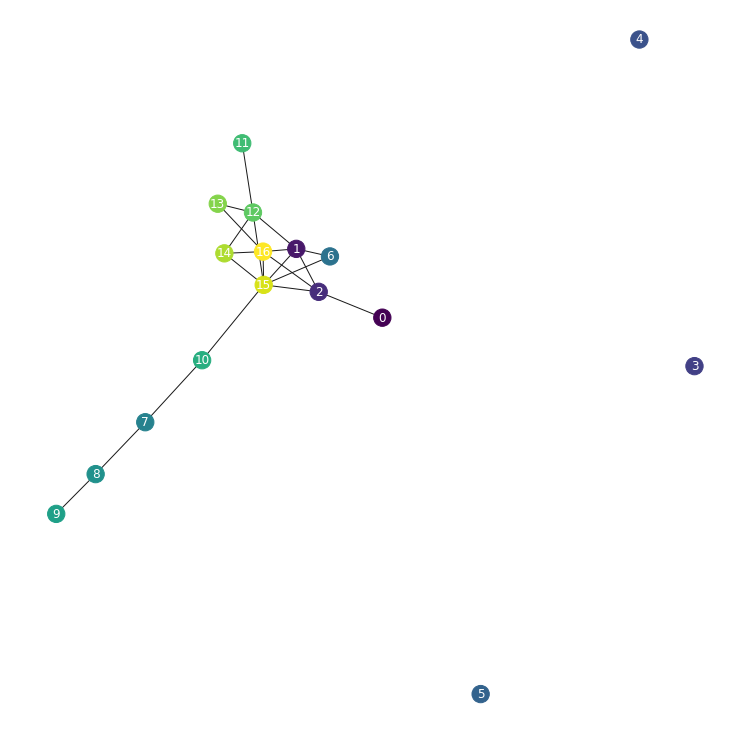

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
values=np.linspace(1,100,17)
nx.draw(G,pos, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

In [ ]:
txt = "welcome to the jungle"
x = txt.split("\n")
print(x)

['welcome to the jungle']


In [ ]:
file_path= '/content/drive/MyDrive//Redes/borges_collected-fictions (1)-270-410.pdf'

reader = PdfReader(file_path)
number_of_pages = len(reader.pages)
text=''
for i in range(number_of_pages):
    page = reader.pages[i]
    text += page.extract_text() + ' ' # Me agrega todo en una sola string
    #text.append(page.extract_text()) # Me agrega todo en una lista con tantos
    # elementos como páginas, está bueno si me interesa conservar el índice de c/pagina

In [ ]:
txt = text.split("\n")

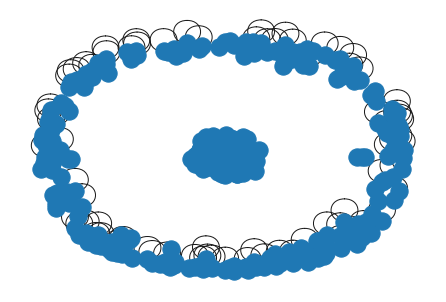

In [ ]:
corpus=txt
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T    
A=pairwise_similarity.toarray()                                                                                                                                                                                                                            


A_filtrada= (A > 0.09).astype(int)-np.identity(len(A))
#A_filtrada= (A == 1).astype(int)
G = nx.from_numpy_matrix(A_filtrada)
pos = nx.spring_layout(G)
nx.draw(G,pos)

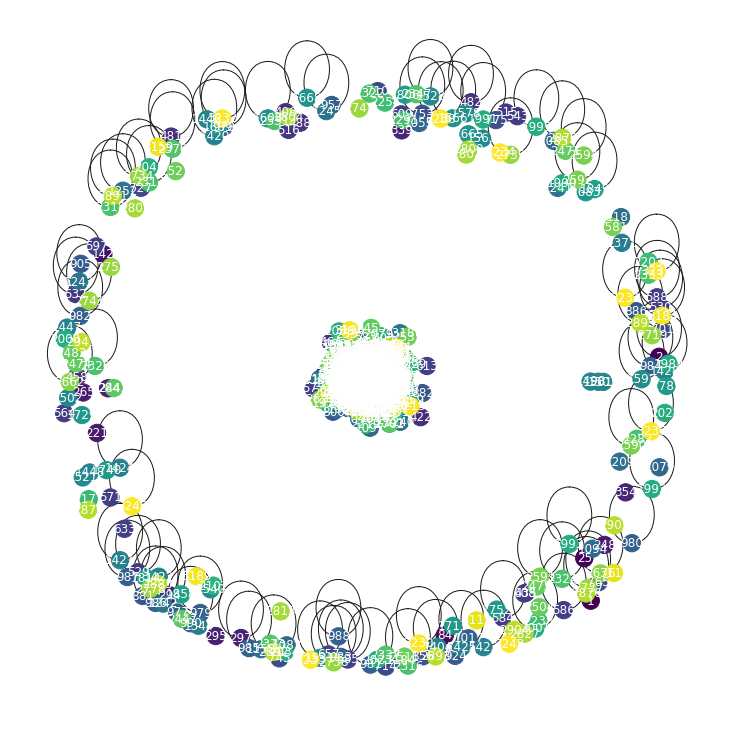

In [ ]:
plt.figure(figsize=(10,10))
values=np.linspace(1,10000,len(G.nodes))
nx.draw(G,pos, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')


In [ ]:
len(G.nodes)

3247

In [12]:
# que pasa si generamos parrafos hablando de lo mismo:

corpus=['La mesa es roja y grande. La usamos para comer y estudiar. Hay otras mesas en la casa: las mesas de luz, la que esta al lado del baño, la mesita de la tele',
        'Existen muchos tipos de mesas en el catalogo. Mesas de comedor, mesas de noche, mesas de jardin, mesas ratonas. Hay mesas que diversos materiales: plastico, madera, metal.',
        'La forma de una mesa es vital importancia. La las prefiero redondas. Una mesa redonda permite manejar muy bien el espacio, muchos comensales juntos. Mi madre prefiere las mesas rectangualres porque tienen cabecera.',
        'Las ciencias naturales nos permiten describir el uviverso que nos rodea. Existe la fisica, la quimica, la bioliga, etc.']


vect = TfidfVectorizer(min_df=1)#, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 

[[1.         0.26816835 0.2656245  0.29945113]
 [0.26816835 1.         0.15014021 0.03050854]
 [0.2656245  0.15014021 1.         0.14486596]
 [0.29945113 0.03050854 0.14486596 1.        ]]


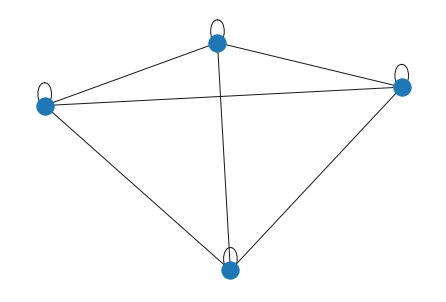

In [13]:
A=pairwise_similarity.toarray()
#A_filtrada= (A > 0.072).astype(int)-np.identity(len(A))
#A_filtrada= (A == 1).astype(int)
G = nx.from_numpy_matrix(A)
#G=nx.from_numpy_matrix(A-np.identity(len(A)))
pos = nx.spring_layout(G)
nx.draw(G,pos)
print(A)

In [39]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # if necessary...

stopwords = nltk.corpus.stopwords.words("spanish")
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words=stopwords)

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


#cosine_sim('La fisica es una ciencia natural, junto con la quimica, la biologia y la geologia','Las mesas son objetos de la casa utiles para comer y estudiar. Hay varias formas de mesas.')

text1='Las palabras de De Pedro, en definitiva, comprometen a Massa para que apure la medida que quiere el kirchnerismo y marcan una distancia con Fernández, que viene diciendo -en público y en privado- que no considera apropiado avanzar con un aumento por suma fija. Un efecto similar al que generó ayer Cristina Kirchner cuando cuestionó con dureza el aumento de la medicina prepaga y advirtió, vía Twitter, que “agrava el proceso inflacionario”.'
text2='Con este acuerdo, Moyano ratifica la volatilidad del mapa salarial y confirma que las negociaciones ya se plantean por encima del 100 por ciento. Significa el triple del índice de inflación anual [33%] que proyectó Martín Guzmán en el presupuesto 2022, que no pasó el filtro del Congreso, y un 20% por arriba de la última pauta salarial de referencia que estableció el Estado en su rol de empleador, hace dos meses, cuando pactó una suba de 80% para los trabajadores de YPF.'
text3='Lo que ocurrió fue que mientras el hombre disparaba en la zona de la dirección, profesores y estudiantes bloqueaban las puertas de sus aulas, según señaló el medio puntano La Gaceta Digital. Además, los estudiantes intercambiaban mensajes de audio entre sí sobre los movimientos del atacante que habría realizado también varios disparos al aires antes de encerrarse.'
text4='Angel Di María también está lesionado. Tiene un desgarro leve que lo tendrá inactivo 20 días, según el parte médico de Juventus, que comunicó días atrás: “Lesión de bajo grado en el isquiotibial del muslo derecho. Tardará unos 20 días en recuperarse por completo”. De esta manera, cuenta con margen para recuperarse y llegar con lo justo para el debut en el Mundial Qatar 2022. “Nosotros estamos muy contentos con él; no sólo porque cuando juega, juega bien. Entiende muy bien el juego, es un chico positivo para el grupo”, contó, tiempo atrás, el conductor del equipo nacional.'
text5='A poco más de tres semanas de Qatar, el volante, de 28 años, fue reemplazado por Enrique Fernández, de 19 años. Salió por sus propios medios, pero con evidentes muestras de dolor. Si es un desgarro, llega con lo justo. O no llega, a la cita máxima del fútbol. Es el reemplazante natural de Leandro Paredes, también lesionado, en Juventus, sobre todo cuando el equipo precisa de mayor rigor en la marca, por sobre el manejo natural del jugador surgido en Boca. Rodríguez, está claro, no es uno más para Scaloni.'
#cosine_sim('La mesa es roja y grande. La usamos para comer y estudiar. Hay otras mesas en la casa: las mesas de luz, la que esta al lado del baño, la mesita de la tele', 'Existen muchos tipos de mesas en el catalogo. Mesas de comedor, mesas de noche, mesas de jardin, mesas ratonas. Hay mesas que diversos materiales: plastico, madera, metal.')
#print cosine_sim('a little bird', 'a little bird chirps')
#print cosine_sim('a little bird', 'a big dog barks')
cosine_sim(text4,text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['alguna', 'alguno', 'ant', 'desd', 'dond', 'durant', 'ello', 'entr', 'erai', 'ere', 'est', 'estabai', 'estamo', 'estaremo', 'estaréi', 'estaríai', 'estaríamo', 'estemo', 'estuv', 'estuvierai', 'estuvies', 'estuviesei', 'estuvimo', 'estuvist', 'estuvistei', 'estuviéramo', 'estuviésemo', 'estábamo', 'estái', 'estéi', 'fuerai', 'fues', 'fuesei', 'fuimo', 'fuist', 'fuistei', 'fuéramo', 'fuésemo', 'habremo', 'habréi', 'habríai', 'habríamo', 'habéi', 'habíai', 'habíamo', 'hayamo', 'hayái', 'hemo', 'hubierai', 'hubies', 'hubiesei', 'hubimo', 'hubist', 'hubistei', 'hubiéramo', 'hubiésemo', 'má', 'nosotra', 'nosotro', 'porqu', 'seamo', 'seremo', 'seréi', 'seríai', 'seríamo', 'seái', 'sient', 

0.03536261190183767